In [2]:
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [3]:
def work_tsne(df_data, segmentation, plot_name=''):
    df_data = df_data[df_data.columns.drop(list(df_data.filter(regex='Unnamed')))]
#     df_data = df_data.dropna()
    # Run TSNE
    tsne_em = TSNE(n_components=2, perplexity=25, n_iter=1000, verbose=1).fit_transform(df_data)
#     print(tsne_em)
    df = pd.DataFrame()
    df["y"] = segmentation
    uniqueValues = segmentation.nunique()
    
    df["comp_1"] = tsne_em[:,0]
    df["comp_2"] = tsne_em[:,1]
#     print(df.loc[df['y'] == 5])
#     print(df)
    sns.scatterplot(x="comp_1", y="comp_2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", uniqueValues),
                data=df).set(title=plot_name)
    return df

In [4]:
import random
def get_example_from_tsne(dataset,result_data,comp_1_min,comp_1_max,comp_2_min,comp_2_max):
    example = result_data[(result_data["y"]==5) &(result_data["comp_1"]>-2) & (result_data["comp_1"]<5)& (result_data["comp_2"]>-40) & (result_data["comp_2"]<-25)]

    pos_of_example = example.iloc[random.randint(0, len(example))].name
#     dataset.iloc[pos_of_example]
    return dataset.iloc[pos_of_example]['full_path'].replace(r'/content/drive/MyDrive',r'C:\Users\oguzkagan\Desktop\coding\other\cse\grad_project')
#     return example[random.randint(0, len(example))]
    

In [5]:
base_path = r"C:\Users\Aziz\Desktop\Github\CSV"

In [6]:
# ARC INFORMATION - don't touch
arc_dataset_path = base_path+"\dataset_info_by_date_arc.csv"
arc_dataset = pd.read_csv(arc_dataset_path)
segmentation_path_arc = base_path+"\like_rate_segmentation_by_date_arc.csv"
df_rate = pd.read_csv(segmentation_path_arc)
segmentation_arc = df_rate['like_rate_segmentation']

In [7]:
# ART INFORMATION - don't touch
art_dataset_path = base_path+"\dataset_info_by_date_art.csv"
art_dataset = pd.read_csv(arc_dataset_path)
segmentation_path_arc = base_path+"\like_rate_segmentation_by_date_art.csv"
df_rate = pd.read_csv(segmentation_path_arc)
segmentation_art = df_rate['like_rate_segmentation']

### calculations:

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 807 samples in 0.003s...
[t-SNE] Computed neighbors for 807 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 807 / 807
[t-SNE] Mean sigma: 53.704448
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.614769
[t-SNE] KL divergence after 1000 iterations: 0.507065


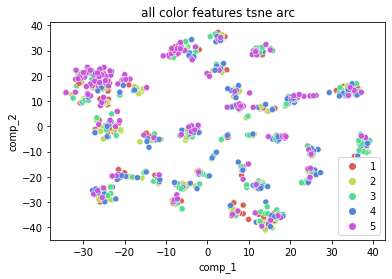

In [48]:
# for color_features arc
color_features_arc = base_path+"\color_palette_and_hue_contrast_arc.csv"
df_color_features = pd.read_csv(color_features_arc)
result_data = work_tsne(df_color_features,segmentation_arc,plot_name='all color features tsne arc')


In [20]:
# for color_features arc
#comp_1_min = -2
#comp_1_max = 5
#comp_2_min = -40
#comp_2_min = -25
#example_path = get_example_from_tsne(arc_dataset,result_data,comp_1_min,comp_1_max,comp_2_min,comp_2_min)
#plt.figure(figsize=(20,10))
#image = mpimg.imread(example_path)
#plt.imshow(image)

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 807 samples in 0.001s...
[t-SNE] Computed neighbors for 807 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 807 / 807
[t-SNE] Mean sigma: 14.589976
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.815567
[t-SNE] KL divergence after 1000 iterations: 0.474798


,y,comp_1,comp_2
0,1,-0.867313,-41.356575
1,1,36.901325,-4.230902
2,1,33.163368,-6.161404
3,1,-9.850812,-29.051279
4,1,-1.973845,-38.481842
...,...,...,...
802,5,9.798201,13.859192
803,5,12.524921,-10.080639
804,5,-10.289544,-23.951910
805,5,-0.179284,-40.592529


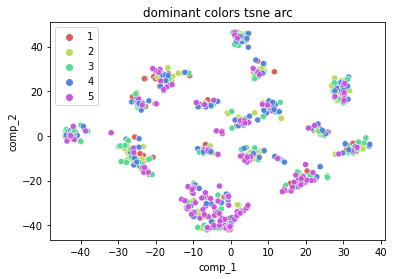

In [31]:
# for color_features arc => only dominant colors
color_features_arc = base_path+"\color_palette_and_hue_contrast_arc.csv"
df_color_features = pd.read_csv(color_features_arc)
df_color_features = df_color_features.drop(['dominant_hue_1','dominant_sat_1','dominant_val_1','dominant_hue_2','dominant_sat_2','dominant_val_2','dominant_hue_3','dominant_sat_3','dominant_val_3','like_rate_segmentation'], axis=1)
work_tsne(df_color_features,segmentation_arc,plot_name='dominant colors tsne arc')

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 807 samples in 0.002s...
[t-SNE] Computed neighbors for 807 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 807 / 807
[t-SNE] Mean sigma: 23.826954
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.769016
[t-SNE] KL divergence after 1000 iterations: 0.561387


,y,comp_1,comp_2
0,1,31.485826,37.620708
1,1,3.604953,16.448639
2,1,4.071388,4.530196
3,1,-17.203268,-19.635117
4,1,-16.676815,-15.953665
...,...,...,...
802,5,4.922148,-39.713390
803,5,-33.989117,-3.545482
804,5,-14.004536,-8.754940
805,5,-15.309234,-0.833740


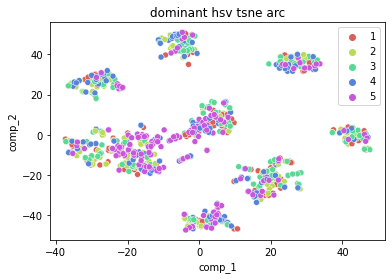

In [32]:
# for color_features arc => only dominant colors
color_features_arc = base_path+"\color_palette_and_hue_contrast_arc.csv"
df_color_features = pd.read_csv(color_features_arc)
df_color_features = df_color_features.drop(['hue_contrast_c1_c2','hue_contrast_c1_c3','hue_contrast_c1_c4','hue_contrast_c1_c5','hue_contrast_c2_c3','hue_contrast_c2_c4','hue_contrast_c2_c5','hue_contrast_c3_c4','hue_contrast_c3_c5','hue_contrast_c4_c5','like_rate_segmentation'], axis=1)
work_tsne(df_color_features,segmentation_arc,plot_name='dominant hsv tsne arc')


[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 807 samples in 0.001s...
[t-SNE] Computed neighbors for 807 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 807 / 807
[t-SNE] Mean sigma: 0.008995
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.452843
[t-SNE] KL divergence after 1000 iterations: 0.375122


,y,comp_1,comp_2
0,1,-30.832010,-0.649855
1,1,28.628540,16.226294
2,1,23.350248,15.804053
3,1,-37.548225,-11.889019
4,1,-25.909241,6.987147
...,...,...,...
802,5,-18.320974,15.880949
803,5,-6.691952,22.142666
804,5,5.566411,-40.919865
805,5,15.310567,22.833883


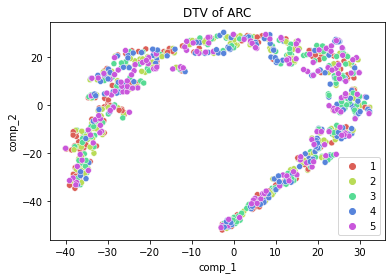

In [22]:
dtv_feature_arc = base_path+"\Dtvarc_ters_normal_updated.csv"
df_dtv_arc = pd.read_csv(dtv_feature_arc)
work_tsne(df_dtv_arc,segmentation_arc,plot_name='DTV of ARC')

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 807 samples in 0.015s...
[t-SNE] Computed neighbors for 807 samples in 0.148s...
[t-SNE] Computed conditional probabilities for sample 807 / 807
[t-SNE] Mean sigma: 34446.443067
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.404747
[t-SNE] KL divergence after 1000 iterations: 0.337387


,y,comp_1,comp_2
0,1,27.806187,9.216307
1,1,9.388543,4.182898
2,1,5.788436,54.265820
3,1,37.132549,-18.215826
4,1,-31.290970,-6.238057
...,...,...,...
802,5,18.820356,-2.594277
803,5,7.094411,51.452866
804,5,26.929890,9.348876
805,5,35.795097,-18.271252


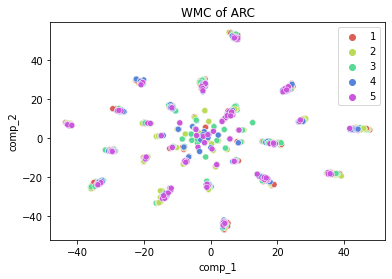

In [23]:
wmc_feature_arc = base_path+"\Wmc_ARC_Ters.csv"
df_wmc_arc = pd.read_csv(wmc_feature_arc)
work_tsne(df_wmc_arc,segmentation_arc,plot_name='WMC of ARC')

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 784 samples in 0.002s...
[t-SNE] Computed neighbors for 784 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 784 / 784
[t-SNE] Mean sigma: 0.015501
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.647110
[t-SNE] KL divergence after 1000 iterations: 0.254030


,y,comp_1,comp_2
0,2,3.521414,-33.455112
1,2,-27.114178,13.889126
2,2,-29.021894,-5.069104
3,3,-28.516584,-12.024348
4,3,-28.875547,2.303059
...,...,...,...
779,1,8.729470,-27.507839
780,1,-21.255596,-23.777393
781,1,-25.415285,-19.458273
782,1,-17.507444,-27.721270


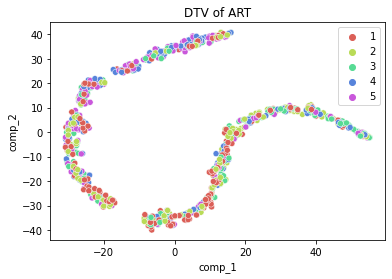

In [24]:
dtv_feature_art = base_path+"\Dtvart_ters_normal_updated.csv"
df_dtv_art = pd.read_csv(dtv_feature_art)
work_tsne(df_dtv_art,segmentation_art,plot_name='DTV of ART')

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 784 samples in 0.015s...
[t-SNE] Computed neighbors for 784 samples in 0.143s...
[t-SNE] Computed conditional probabilities for sample 784 / 784
[t-SNE] Mean sigma: 52952.867193
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.931820
[t-SNE] KL divergence after 1000 iterations: 0.416656


,y,comp_1,comp_2
0,2,-3.551466,21.437338
1,2,-31.104603,29.417969
2,2,20.185726,25.814133
3,3,-22.356968,-6.962401
4,3,6.227250,39.162399
...,...,...,...
779,1,-7.120543,-30.749416
780,1,19.090376,9.884949
781,1,10.103032,-10.879400
782,1,-35.697681,-7.913156


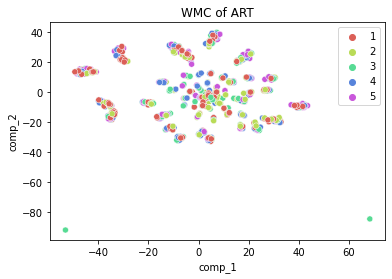

In [25]:
wmc_feature_art = base_path+"\Wmc_ART_Ters.csv"
df_wmc_art = pd.read_csv(wmc_feature_art)
work_tsne(df_wmc_art,segmentation_art,plot_name='WMC of ART')

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 784 samples in 0.003s...
[t-SNE] Computed neighbors for 784 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 784 / 784
[t-SNE] Mean sigma: 46.415258
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.899269
[t-SNE] KL divergence after 1000 iterations: 0.613658


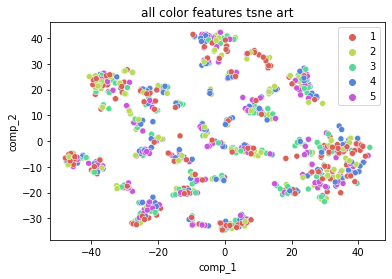

In [49]:
# for color_features art
color_features_art = base_path+"\color_palette_and_hue_contrast_art.csv"
df_color_features = pd.read_csv(color_features_art)

df_color_features = df_color_features.iloc[: , 1:]
result_data = work_tsne(df_color_features,segmentation_art,plot_name='all color features tsne art')


[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 784 samples in 0.001s...
[t-SNE] Computed neighbors for 784 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 784 / 784
[t-SNE] Mean sigma: 18.173107
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.503525
[t-SNE] KL divergence after 1000 iterations: 0.547716


,y,comp_1,comp_2
0,2,15.017207,34.498081
1,2,0.052171,-16.617294
2,2,7.581075,-9.772119
3,3,5.635700,-7.888240
4,3,-18.143988,-26.500860
...,...,...,...
779,1,1.878282,11.417613
780,1,19.250628,-18.060051
781,1,-9.690338,-37.647224
782,1,6.864875,32.658180


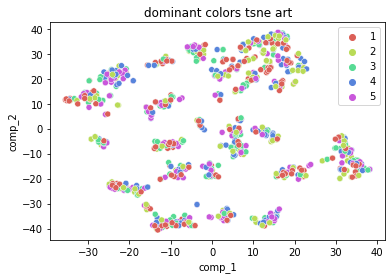

In [46]:
# for color_features arc => only dominant colors
color_features_art = base_path+"\color_palette_and_hue_contrast_art.csv"
df_color_features = pd.read_csv(color_features_art)
df_color_features = df_color_features.iloc[: , 1:]
df_color_features = df_color_features.drop(['dominant_hue_1','dominant_sat_1','dominant_val_1','dominant_hue_2','dominant_sat_2','dominant_val_2','dominant_hue_3','dominant_sat_3','dominant_val_3','like_rate_segmentation'], axis=1)
work_tsne(df_color_features,segmentation_art,plot_name='dominant colors tsne art')

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 784 samples in 0.001s...
[t-SNE] Computed neighbors for 784 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 784 / 784
[t-SNE] Mean sigma: 26.678200
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.260975
[t-SNE] KL divergence after 1000 iterations: 0.620305


,y,comp_1,comp_2
0,2,-33.297436,-2.176567
1,2,-21.169754,-2.949191
2,2,-15.907722,-7.664328
3,3,51.525692,8.117844
4,3,-12.904991,42.293945
...,...,...,...
779,1,48.691399,1.084431
780,1,5.653882,44.267918
781,1,-14.867927,-8.916602
782,1,40.441540,0.006194


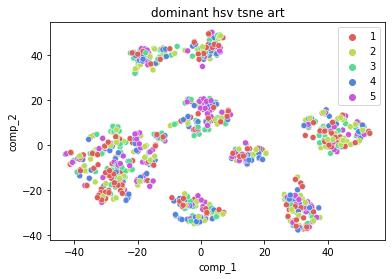

In [47]:
# for color_features arc => only dominant colors
color_features_art = base_path+"\color_palette_and_hue_contrast_art.csv"
df_color_features = pd.read_csv(color_features_art)
df_color_features = df_color_features.iloc[: , 1:]
df_color_features = df_color_features.drop(['hue_contrast_c1_c2','hue_contrast_c1_c3','hue_contrast_c1_c4','hue_contrast_c1_c5','hue_contrast_c2_c3','hue_contrast_c2_c4','hue_contrast_c2_c5','hue_contrast_c3_c4','hue_contrast_c3_c5','hue_contrast_c4_c5','like_rate_segmentation'], axis=1)
work_tsne(df_color_features,segmentation_art,plot_name='dominant hsv tsne art')
